# DSFB Course Project: Predicting IPO Share Price

![](https://img.etimg.com/thumb/height-480,width-640,msid-64038320,imgsize-108012/stock-market2-getty-images.jpg)

image source : https://img.etimg.com/thumb/height-480,width-640,msid-64038320,imgsize-108012/stock-market2-getty-images.jpg

## Introduction

An Initial Public Offering (IPO) is the process by which a private company becomes publicly traded on a stock exchange. The IPO company offers its shares to public investors in exchange of capital for sustaining expansion and growth. For this reason, IPOs are often issued by small or young companies, but they can also be done by large  companies looking to become publicly traded. During an IPO, the company obtains the assistance of an investment bank (underwriter), which helps determine the type, amount and price of the shares being offered. Decisions about the offering price are particularly important to avoid incurring excessive costs and maximize the capital received in the IPO. However at the end of the first trading day, price of each share can change due to market dynamics, which can lead to a price higher or lower than the offering one.

During an Initial Public Offering (IPO), the firm’s management have to disclose all relevant information about their business in a filing with the government called the "IPO Prospectus." Although there might be concerns about the public disclosure of sensitive information in the Prospectus that can help competitors, firms are encouraged to be as transparent as possible in order to avoid future litigation (lawsuits). A key textual field from the prospectus is:

__Risk_Factors__: Firms have to disclose all relevant information about internal or external risk factors that might affect future business performances. This information is contained in the “Risk Factors” section of the IPO prospectus. 

The key pricing variables are:

__Offering_Price__: the price at which a company sells its shares to investors.

__Num_Shares__: the total number of outstanding shares.

__Closing_Price__: (at the end of the first day of training) price at which shares trade in the open market, measured at the end of the first day of trading.

In this project you are provided with IPO data of different firms that are collected from different sources. You can find the dataset under project directory in the course git repository under the name of *ipo.xlsx*. The description of other variables can be found in *variable_description.xlsx*.

This Notebook will be presented as follow :

# Pre Processing
#####  libraries & useful functions
## 1 Import Dataset
## 2 Pre-processing of Dates Features
## 3 Pre-processsing of Special Features
## 4 Pre-processing of Categorical Features
## 5 Pre-processing of Ordinal Features
## 6 Pre-processing of Numerical Features
## 7 Pre-processing of Textual Features
## 8 Target 
## 9 Feature Reduction
        1 Correlation with target
        2 Correlation between features
## 10 Send CSV      
# -----------------------------------------



# Pre-Processing

##### Libraries & Useful functions  

In [ ]:
from bs4 import BeautifulSoup
import pandas as pd     
import seaborn as sns
import re as re
import datetime as dt
import matplotlib.pyplot as plt
import nltk

nltk.download('stopwords')
from nltk.corpus import stopwords 
from nltk.stem import SnowballStemmer

from threading import Thread
from datetime import datetime, timedelta
from sklearn.base import TransformerMixin
from sklearn.metrics import roc_curve
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

In [ ]:
from preprocessing_functions import *

## 1 Import Dataset 

##### Import,  explore dataset and check missing values

In [ ]:
#read dataset
DATA_FOLDER = 'data'
ipo = pd.read_excel(DATA_FOLDER + '/ipo.xlsx')
ipo_to_predict = pd.read_excel(DATA_FOLDER+'/ipo_to_predict.xlsx')

#merge
ipo = ipo.append(ipo_to_predict, ignore_index=True)

#### Declaration of categorization table to use in the data preprocessing

##### Date Columns

In [ ]:
date_col = ['amd_date', 'lockup_date', 'lockup_days']

##### Ordinal Columns

In [5]:
ord_col = []

##### Numerical Columns

In [6]:
num_col = ['amd_nbr','round_tot','mgt_fee', 'gross_spread', 'min_round_vexp','avg_round_vexp', 'max_round_vexp',\
           'min_firm_amt_vexp', 'avg_firm_amt_vexp', 'max_firm_amt_vexp',\
          'min_fund_amt_vexp', 'max_fund_amt_vexp']

##### Categorical Columns

In [7]:
cat_col = ['exch', 'mgrs_role', 'mgrs','all_sic' ,'description','ht_ind', 'ht_ind_gr', 'ind_group','legal', 'uop' ]

##### Columns to Drop

In [8]:
columns_to_drop = ['ID','dj_avg_2','nasdaq_avg_2','SP2','SP4']

#### Explore data set

In [9]:
#Check if duplicates
ipo[ipo.astype(str).duplicated()==True]

,Closing_Price,ID,Num_Shares,Offering_Price,Price_All,Price_Change_All,Price_Change_Non_Textual,Price_Change_Textual,Risk_Factors,SEC_fee,...,tot_ass_after,tot_inv,tot_mgtfee,tot_proceeds,tot_shs_offered,underw_fee,uop,vc,veic_descr,zip


In [10]:
#Number of actual features
len(ipo.columns)

159

In [11]:
# check missing values
nb_missing_values = sum(map(any, ipo.isnull()))
nb_missing_values

159

In [12]:
#Count missing 
features_with_nan = len(ipo) - ipo.count()
features_with_nan=features_with_nan[features_with_nan!=0]
nan_percentage=(features_with_nan/len(ipo)).to_frame('percentage').reset_index().rename(columns={'index':'feature'})

In [13]:
features_nan_percentage = nan_percentage[nan_percentage.percentage>0.5]
features_nan_percentage

,feature,percentage
1,Price_All,1.000000
2,Price_Change_All,1.000000
3,Price_Change_Non_Textual,1.000000
4,Price_Change_Textual,1.000000
6,Your_Bet,1.000000
22,bvps_bef_offer,0.592113
39,int_aft,0.594416
40,int_bef,0.591249
41,intern)shs,0.800518
66,pb_value,0.593552


In [14]:
#Drop column with more than 50% of missing values
list_to_append = features_nan_percentage.feature.values
columns_to_drop = add_list_to_list(list_to_append, columns_to_drop)

In [15]:
#Check type of values
ipo.dtypes.unique()

array([dtype('float64'), dtype('O'), dtype('int64'), dtype('<M8[ns]')],
      dtype=object)

In [16]:
#Devide dataframe in function of type.
ints = ipo.select_dtypes(include='int64')
floats = ipo.select_dtypes(include='float64')
objects = ipo.select_dtypes(include='object')
timestamps = ipo.select_dtypes(include='M8[ns]')

In [17]:
# make a copy of the df
ipo_processing = ipo.copy()

## 2 Pre-processsing of Date Features


### amd_date


In [18]:
#calculate number of amendment
ipo_processing['amd_nbr'] = ipo['amd_date'].apply(lambda x:  str(x).count('\n')+1 if( str(x).count('\n') > 0) else ( 1 if(len(str(x)) > 0) else 0 ) )
num_col.append('amd_nbr')
columns_to_drop.append('amd_date')

### lockup_date

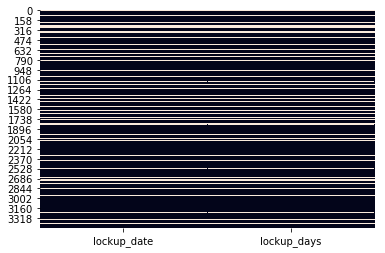

In [19]:
#Check if missing values are the same
sns.heatmap(ipo[['lockup_date','lockup_days', ]].isnull(), cbar=False)

In [20]:
#Get days only last 
ipo_processing['lockup_last_duration'] = ipo['lockup_days'].apply(lambda x: str(x) if( pd.isnull(x) ) else str(x)[-3:] )
#Cast it as a number
ipo_processing['lockup_last_duration'] = ipo_processing['lockup_last_duration'].apply(lambda x: int(x) if( str(x).isdigit() ) else np.nan )
#replace missing values
ipo_processing['lockup_last_duration'] = replace_nan(ipo_processing['lockup_last_duration'], '')

#Add
num_col.append('lockup_last_duration')

#We remove lockup_date because this information is rundandant in the lockup days we can calculate from the frist trade date
columns_to_drop.append('lockup_date')

#nan :646


### offer_date, first_trade_date, issue_date

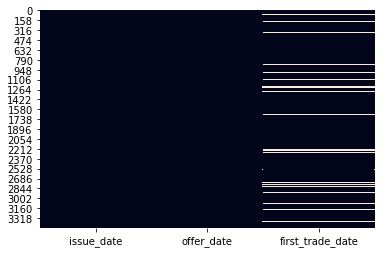

In [21]:
#Compare number of missing value offer_date and issue_date ares nearly the same.
sns.heatmap(ipo[['issue_date','offer_date', 'first_trade_date']].isnull(), cbar=False)

In [22]:
#Replace missing value by the most frequent one and get timestamp to compare datas
for columnWeTransform in ['issue_date','offer_date', 'first_trade_date']:
    ipo_processing[columnWeTransform] = ipo[columnWeTransform].apply(lambda x: str(x)[0:10])
    ipo_processing[columnWeTransform] = replace_nan(ipo[columnWeTransform], '1900-01-01')
    ipo_processing[columnWeTransform] = ipo_processing[columnWeTransform].apply(lambda x: pd.to_datetime(x).timestamp())

#nan :0
#nan :0
#nan :334


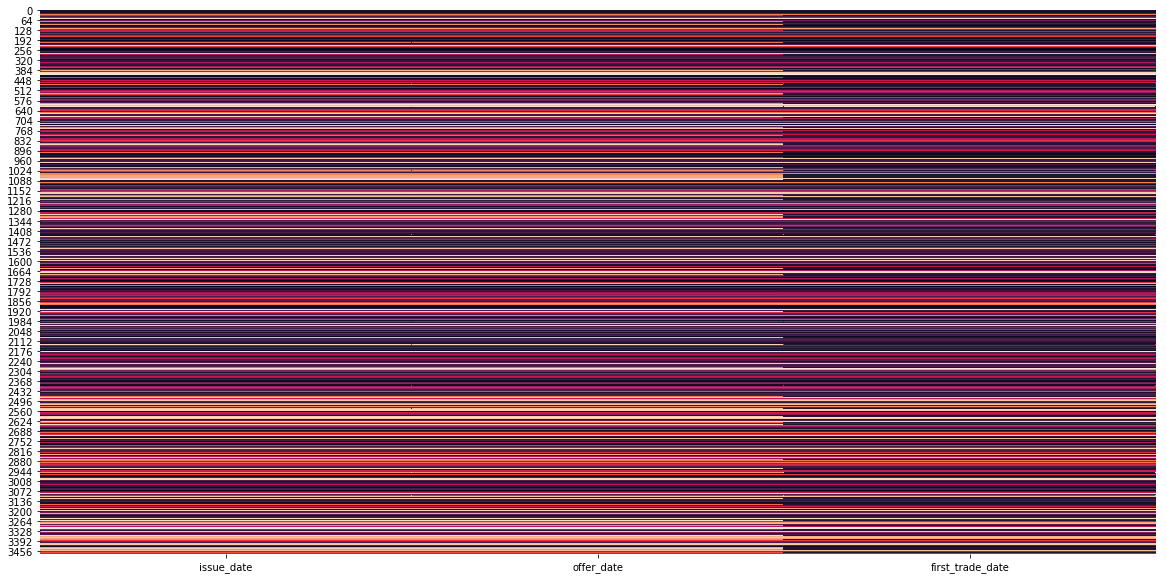

In [23]:
#Look at the values
plt.figure(figsize=(20,10))
sns.heatmap(ipo_processing[['issue_date','offer_date', 'first_trade_date']], cbar=False)

In [24]:
#drop first_trade_date and issue_date and keep offer_date
columns_to_drop.append('first_trade_date')
columns_to_drop.append('issue_date')
columnWeTransform = 'offer_date'

# read dataset of the american 10 year bond rate
# This give us more info on the actual risk premium
rate = pd.read_csv(DATA_FOLDER + '/HQMCB10YR.csv')
rate.rename(columns = {'DATE':columnWeTransform, 'HQMCB10YR':'rate'}, inplace = True)
rate[columnWeTransform] = rate[columnWeTransform].apply(lambda x: pd.to_datetime(x))
rate.head(2)

#Merge rate on the dataframe
ipo_processing[columnWeTransform] = ipo[columnWeTransform].apply(lambda x: pd.to_datetime(str(x.year)+'-'+str(x.month)+'-01') if( not(pd.isna(x))) else pd.to_datetime('1900-01-01'))
ipo_processing = ipo_processing.merge(rate, how='left')
columns_to_drop.append(columnWeTransform)
num_col.append('rate')

#Replace missing value rate
ipo_processing.rate = replace_nan(ipo_processing.rate, '')

#Replace missing value by the most frequent one.
ipo_processing[columnWeTransform] = ipo[columnWeTransform].apply(lambda x: str(x)[0:10])
ipo_processing[columnWeTransform] = replace_nan(ipo[columnWeTransform], '1900-01-01')
ipo_processing[columnWeTransform] = ipo_processing[columnWeTransform].apply(lambda x: pd.to_datetime(x))

#Create new features
# Timestamp
ipo_processing['timestamp'] = ipo_processing[columnWeTransform].apply(lambda x: dt.datetime(year=int(x.year), month=int(x.month), day=int(x.day)).timestamp())
num_col.append('timestamp')
# Year
ipo_processing['year'] = ipo_processing[columnWeTransform].apply(lambda x: x.year)
num_col.append('year')

# Convert circular temporal features into sin and cos features
# Month
ipo_processing['month'] = ipo_processing[columnWeTransform].apply(lambda x: x.month)
ipo_processing['month_sin'] = np.sin((ipo_processing.month-1)*(2.*np.pi/12))
ipo_processing['month_cos'] = np.cos((ipo_processing.month-1)*(2.*np.pi/12))
columns_to_drop.append('month')
num_col.append('month_sin')
num_col.append('month_cos')
# Day
ipo_processing['day'] = ipo_processing[columnWeTransform].apply(lambda x: x.day)
ipo_processing['day_sin'] = np.sin((ipo_processing.day-1)*(2.*np.pi/31))
ipo_processing['day_cos'] = np.cos((ipo_processing.day-1)*(2.*np.pi/31))
columns_to_drop.append('day')
num_col.append('day_sin')
num_col.append('day_cos')
# Day of week
ipo_processing['dow'] = ipo_processing[columnWeTransform].apply(lambda x: x.dayofweek)
ipo_processing['dow_sin'] = np.sin((ipo_processing.dow-1)*(2.*np.pi/7))
ipo_processing['dow_cos'] = np.cos((ipo_processing.dow-1)*(2.*np.pi/7))
columns_to_drop.append('dow')
num_col.append('dow_sin')
num_col.append('dow_cos')

columns_to_drop.append(columnWeTransform)

#nan :0
#nan :0


### date_amd

In [25]:
#Convert from excel date to datetime
ipo_processing['date_amd'] = replace_nan(ipo['date_amd'], '')
ipo_processing['date_amd'] = ipo_processing['date_amd'].apply(lambda x: from_excel_ordinal(x) )

#Calculate difference between date_amd and offer_date save number of days as int
ipo_processing['offer_date'] = ipo['offer_date'].apply(lambda x: pd.to_datetime(x) )
ipo_processing['time_amd'] = ipo_processing.apply(lambda x: x['offer_date']-x['date_amd'], axis=1 )
ipo_processing['time_amd'] = ipo_processing['time_amd'].apply(lambda x: x.days)
num_col.append('time_amd')

#column to drop:
columns_to_drop.append('date_amd')

#nan :11


## 3 Pre-processsing of Special Features


### description

We split it into 2 one numerical and second categorical

In [26]:
ipo['description'].head(2)

0    5,000,000.0 Common Shares
1    6,898,541.0 Common Shares
Name: description, dtype: object

In [27]:
# delete the ',' in the features description
ipo_processing['description'] = ipo['description'].str.replace(',','',regex=False)

# split description into 2 string
split_description = ipo_processing.description.str.split('.0 ')

# create desctiption_numeric as the nb written in description 
ipo_processing['description_numeric']= split_description.apply(lambda x: int(x[0]))
num_col.append('description_numeric')

# create description cat as the category of the number of shares
ipo_processing['description_cat'] =  split_description.apply(lambda x: x[1])
cat_col.append('description_cat')

# drop description
columns_to_drop.append('description')

### all_sic

We will reduce this number by a 2 digit categories for all_sic

In [28]:
ipo_processing.all_sic = ipo.all_sic.str.split('/')

ipo_processing.all_sic = ipo_processing.all_sic.apply(lambda x: [a[:2] for a in x])

We will use this file to reduce the number of categories:

In [29]:
all_sic_mapping = pd.read_excel(DATA_FOLDER + '/all_sic_mapping.xlsx',delimiter = ',')

In [30]:
## Cleaning file:
all_sic_mapping.range_sic = all_sic_mapping.range_sic.str.split('-')
all_sic_mapping.range_sic= all_sic_mapping.range_sic.apply(lambda x: [int(a[:2]) for a in x])
all_sic_mapping.range_sic = all_sic_mapping.range_sic.apply(lambda x: np.arange(x[0],x[1]+1))

In [31]:
## Map all_sic values to new ones
splitted = all_sic_mapping.range_sic.apply(pd.Series).stack().reset_index(level = 1,drop = True).to_frame('range')
merged = pd.merge(splitted,all_sic_mapping,left_on = splitted.index, right_on=  all_sic_mapping.index,how = 'left')
merged_2 = merged[['range','cat']]
merged_2.range = merged_2.range.astype(int)
merged_2.set_index('range',inplace = True)

#Apply to the dataset
ipo_processing.all_sic = ipo_processing.all_sic.apply(lambda x : [merged_2.loc[int(a)] if (int(a) in merged_2.index.values) else int(a) for a in x ] )
ipo_processing.all_sic = ipo_processing.all_sic.apply(lambda x: [item for sublist in x for item in sublist])

C:\Users\Julien\Anaconda3\lib\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [32]:
ipo_processing = pd.concat([ipo_processing,pd.get_dummies(ipo_processing.all_sic.apply(pd.Series).stack()).sum(level=0)],axis = 1)

#Add new categorical col
cat_col = add_list_to_list(all_sic_mapping.cat, cat_col)

#Columns to drop
columns_to_drop.append('all_sic')


### zip
We will use this file 'us_postal_codes.csv' to get cities and state to replace where there is missing values

In [33]:
#Read us postal file
us_zip = pd.read_csv(DATA_FOLDER + '/us_postal_codes.csv', sep=',')
us_zip.rename(columns={'Zip Code': 'zip', 'Place Name':'city_zip', 'State':'state_zip'}, inplace=True)

# Drop infos that we don't want
us_zip = us_zip.drop(columns=['State Abbreviation', 'County', 'Latitude', 'Longitude'])
us_zip.head()

#Merge in function of the ZIP code
ipo_processing.zip = ipo.zip.apply(lambda x: str(x)[:5])
ipo_processing.zip = ipo_processing.zip.apply(lambda x: int(x) if (str.isdigit(x)) else 0 )
ipo_processing['zip'] = ipo_processing.apply(lambda x: int(str(x['zip'])[:5]) if ( str(x['nation']) == 'United States' ) else 0 , axis=1)
ipo_processing = ipo_processing.merge(us_zip, how='left')
ipo_processing.state.fillna('Outside US', inplace=True)

#Replace where missing city and stateS
print("Number of city replaced : " + str(ipo_processing['city'].isna().sum() - ipo_processing['city_zip'].loc[ipo_processing['city'].isna()].isna().sum()))
ipo_processing['city'].loc[ipo_processing['city'].isna()] = ipo_processing.loc[ipo_processing['city'].isna()]['city_zip']

print("Number of state replaced : " + str(ipo_processing['state'].isna().sum() - ipo_processing['state_zip'].loc[ipo_processing['state'].isna()].isna().sum()))
ipo_processing['state'].loc[ipo_processing['state'].isna()] = ipo_processing.loc[ipo_processing['state'].isna()]['state_zip']

#Remove city_zip and zip
columns_to_drop.append('state_zip')
columns_to_drop.append('city_zip')
columns_to_drop.append('zip')

Number of city replaced : 1
Number of state replaced : 0


C:\Users\Julien\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


## 4 Pre-processing of Categorical Features


### issuer

Issuer is not relevant because has same number of issuer than number of row

In [34]:
len(ipo['issuer']) == len(ipo.issuer.unique())

True

In [35]:
columns_to_drop.append('issuer')

### Processing categories with \n separator

In [36]:
columns_with_n = ['mgrs_role','mgrs','ht_ind_gr','ht_ind','uop','legal','exch','br']

for col in columns_with_n:
    print('processing column ' + col)
    ipo_processing,columns_to_drop = process_categorical_with_sep(ipo_processing,col,'\n',columns_to_drop)

processing column mgrs_role
#nan :0
processing column mgrs
#nan :0
processing column ht_ind_gr
#nan :2
processing column ht_ind
#nan :2
processing column uop
#nan :0
processing column legal
#nan :0
processing column exch
#nan :0
processing column br
#nan :0


### Processing categories with / separator

In [37]:
columns_with_I = ['industry']

for col in columns_with_I:
    print('processing column ' + col)
    ipo_processing,columns_to_drop = process_categorical_with_sep(ipo_processing,col,'/',columns_to_drop)

processing column industry
#nan :0


### Processing all others categories

In [38]:
to_dummies = ['description_cat','state','auditor','city','ind_group','veic_descr','naic_primary','naic_decr','public_descr','lockup_flag','sic_main','nation','lbo','prim_naic','prim_uop','pe_backed','shs_out_after','vc']
to_dummies = add_list_to_list(cat_col, to_dummies)
to_dummies = list(set(to_dummies))

for col in to_dummies:
    if not col in all_sic_mapping['cat'].tolist():
        if not col in columns_to_drop:
            print('processing column ' + col)
            ipo_processing,columns_to_drop = process_cat_columns(ipo_processing,col,columns_to_drop)

processing column public_descr
#nan :0
processing column prim_uop
#nan :0
processing column city
#nan :5
processing column pe_backed
#nan :0
processing column vc
#nan :0
processing column naic_primary
#nan :0
processing column auditor
#nan :13
processing column nation
#nan :0
processing column lbo
#nan :0
processing column sic_main
#nan :0
processing column shs_out_after
#nan :0
processing column description_cat
#nan :0
processing column naic_decr
#nan :1
processing column ind_group
#nan :0
processing column veic_descr
#nan :204
processing column lockup_flag
#nan :0
processing column state
#nan :0
processing column prim_naic
#nan :0


## 5 Pre-processing of Ordinal Features

### price_range : Ordinal 
Since Price_range is an ordinal feature we will map it: 

In [39]:
ord_col = ['price_range']

ipo_processing.price_range.unique()

array(['Above range', 'Below range', 'Within range', nan], dtype=object)

In [40]:
price_range = ipo['price_range']

print(len(price_range.unique()))
price_range = replace_nan(price_range,'nan')
print(len(price_range.unique()))

dict_p = {'Above range': 3,
          'Within range':2,
          'Below range':1, 
            np.nan: 0}

ipo_processing.price_range = ipo_processing.price_range.replace(dict_p)

4
#nan :18
3


Offering_Price: the price at which a company sells its shares to investors.

Num_Shares: the total number of outstanding shares.

Closing_Price: (at the end of the first day of training) price at which shares trade in the open market, measured at the end of the first day of trading.

## 6 Pre-processing of Numerical Features


We will start by numerical features that needs more preprocessing, and then replace all nan values at the end in all numerical features

### round_tot

In [41]:
#Sum value
ipo_processing['round_tot'] = ipo['round_tot']
ipo_processing = sum_list_columns(ipo_processing,'round_tot')

### lockup_days

In [42]:
#Sum days
ipo_processing['lockup_days'] = ipo['lockup_days']
ipo_processing = sum_list_columns(ipo_processing,'lockup_days')

### mgt_fee, gross_spread

##### Replace what is not numeric by a nan will replace all nan at the end

In [43]:
ipo_processing['mgt_fee'] =ipo['mgt_fee'].replace('Comb.', np.nan)
ipo_processing['gross_spread'] = ipo['gross_spread'].replace('na', np.nan)

### Replace ' in some numerical features:

In [44]:
col_to_replace = ['min_round_vexp','avg_round_vexp', 'max_round_vexp', 'min_firm_amt_vexp', 'avg_firm_amt_vexp', 'max_firm_amt_vexp',\
          'min_fund_amt_vexp', 'max_fund_amt_vexp']
for col in col_to_replace:
    ipo_processing[col] = ipo[col].str.replace("'",'')
num_col = add_list_to_list(col_to_replace, num_col)

### Replace missing values of numerical features

In [45]:
###  Replace missing values in all num
for col in num_col:
    if not(col in columns_to_drop):
        ipo_processing[col] = DataFrameImputer().fit_transform(ipo_processing[[col]].astype(np.float32))[col]

In [46]:
### Replace missing values in all float
floats = ipo.select_dtypes(include='float64')

for col in floats.columns:
    if not(col in columns_to_drop):
        ipo_processing[col] = DataFrameImputer().fit_transform(ipo_processing[[col]].astype(np.float32))[col]

In [47]:
### Replace missing values in all float
ints = ipo.select_dtypes(include='int64')

for col in ints.columns:
    if not(col in columns_to_drop):
        ipo_processing[col] = DataFrameImputer().fit_transform(ipo_processing[[col]].astype(np.int32))[col]

### Drop columns to drop

In [48]:
print(columns_to_drop)
ipo_processing.drop(columns_to_drop,inplace=True,axis=1)

['ID', 'dj_avg_2', 'nasdaq_avg_2', 'SP2', 'SP4', 'Price_All', 'Price_Change_All', 'Price_Change_Non_Textual', 'Price_Change_Textual', 'Your_Bet', 'bvps_bef_offer', 'int_aft', 'int_bef', 'intern)shs', 'pb_value', 'pct_int_shs', 'amd_date', 'lockup_date', 'first_trade_date', 'issue_date', 'offer_date', 'month', 'day', 'dow', 'offer_date', 'date_amd', 'description', 'all_sic', 'state_zip', 'city_zip', 'zip', 'issuer', 'mgrs_role', 'mgrs', 'ht_ind_gr', 'ht_ind', 'uop', 'legal', 'exch', 'br', 'industry', 'public_descr', 'prim_uop', 'city', 'pe_backed', 'vc', 'naic_primary', 'auditor', 'nation', 'lbo', 'sic_main', 'shs_out_after', 'description_cat', 'naic_decr', 'ind_group', 'veic_descr', 'lockup_flag', 'state', 'prim_naic']


#### Final check for the Nan

In [49]:
ipo_processing.isnull().values.sum()

0

In [50]:
ipo_processing.columns[ipo_processing.isna().any()].tolist()

[]

In [94]:
print(ipo_processing.shape)

(3474, 3720)


# 7 Pre-processing of textual features

### Risk_Factors :  Textual description of all the risk / done 


In [51]:
risks = ipo['Risk_Factors']

In [56]:
risks.head()

0    >risk factors \ninvesting in our common stock ...
1    risk factors an investment in our common stock...
2    RISK FACTORS In addition to the other informat...
3    RISK FACTORS An investment in the shares of Co...
4    RISK FACTORS In addition to the other informat...
Name: Risk_Factors, dtype: object

### TFIDF

In [54]:
# TFIDF --------------------------------------------------------------------------------------------
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

vectorizer = TfidfVectorizer(max_features = 500)
risks_tfidf = vectorizer.fit_transform(risks)
risks_tfidf = risks_tfidf.toarray()

#Convert to a dataframe
risks_tfidf = pd.DataFrame(risks_tfidf)

In [66]:
# Drop textual Feature
ipo_processing.drop('Risk_Factors',inplace=True,axis=1)

In [62]:
print(len(risks_tfidf))
risks_tfidf.head()

3474


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.000000,0.011682,0.000000,0.0,0.031936,0.013500,0.041166,0.005408,0.000000,0.000000,...,0.000000,0.004820,0.037489,0.060714,0.000000,0.010643,0.010829,0.010382,0.004309,0.007087
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.021924,0.008493,0.002372,0.000000,...,0.004416,0.000000,0.020185,0.038699,0.009456,0.000000,0.013605,0.000000,0.004060,0.004452
2,0.042660,0.003910,0.041396,0.0,0.014578,0.000000,0.026961,0.000000,0.012640,0.009242,...,0.000000,0.004034,0.098600,0.047820,0.000000,0.010688,0.012083,0.027802,0.003606,0.000000
3,0.022187,0.005423,0.036907,0.0,0.013478,0.009401,0.022851,0.014646,0.002922,0.000000,...,0.000000,0.008391,0.093238,0.035233,0.002912,0.014823,0.010474,0.009640,0.000000,0.000000
4,0.032095,0.004707,0.028474,0.0,0.020472,0.013599,0.012621,0.014528,0.002536,0.000000,...,0.002361,0.007283,0.086320,0.044971,0.002527,0.010721,0.001818,0.010458,0.013021,0.000000


In [63]:
# Check for Nan
risks_tfidf.isnull().values.sum()

0

## 8 : TARGET

In [67]:
ipo_processing['Target'] = ipo_processing.Closing_Price >= ipo_processing.Offering_Price 

In [68]:
len(ipo_processing.Closing_Price == ipo_processing.Offering_Price )

3474

In [69]:
len(ipo_processing['Target'])

3474

In [70]:
ipo_processing.Target = ipo_processing.Target.astype(int)

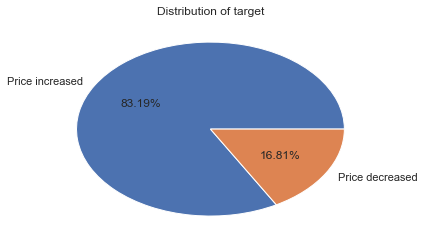

In [71]:
counts = ipo_processing.Target.value_counts()

sns.set()

ones = counts[1]/len(counts) * 100
zeros = counts[0]/len(counts) * 100
labels = 'Price increased', 'Price decreased'
plt.pie( [ones, zeros], labels=labels, autopct='%1.2f%%', startangle=360)
plt.title('Distribution of target')
plt.show()

## 9 Features Reduction

### 9.1. Check the correlation of the features
    -> Drop bottom 5%
### 9.2. Check the correlation with the Target   

In [72]:
# check if only numbers inside the dataframe
print(ipo_processing.dtypes.unique())

[dtype('float32') dtype('int32') dtype('float64') dtype('int64')
 dtype('uint8')]


In [76]:
# compute the correlation matrix
corr = ipo_processing.corr(method='pearson').abs()
print(type(corr))

<class 'pandas.core.frame.DataFrame'>


In [77]:
#convert corr to a dataframe 
#corr = pd.DataFrame(corr[0])
#corr = pd.DataFrame(corr)
corr.head()

,Closing_Price,Num_Shares,Offering_Price,SEC_fee,SP1,SP3,acc_fee,amd_hp,amd_lp,amd_mp,...,56,61,62,71,72,81,92,BB,BC,Target
Closing_Price,1.000000,0.158282,0.655758,0.132872,0.003635,0.127785,0.028099,0.558169,0.560333,0.560190,...,0.056739,0.002727,0.038135,0.010627,0.001870,0.011065,0.004112,0.059704,0.011131,0.187750
Num_Shares,0.158282,1.000000,0.293897,0.613709,0.178431,0.169671,0.235449,0.302089,0.294869,0.299048,...,0.019205,0.013801,0.014349,0.005389,0.041523,0.003005,0.007450,0.019449,0.027331,0.012038
Offering_Price,0.655758,0.293897,1.000000,0.308456,0.135232,0.145083,0.122167,0.948564,0.949363,0.950735,...,0.005291,0.003766,0.028186,0.010086,0.004975,0.002146,0.000392,0.030156,0.017805,0.008554
SEC_fee,0.132872,0.613709,0.308456,1.000000,0.003662,0.020921,0.169188,0.322583,0.315690,0.319747,...,0.013126,0.014432,0.022831,0.000371,0.001565,0.005349,0.002339,0.025410,0.005978,0.001251
SP1,0.003635,0.178431,0.135232,0.003662,1.000000,0.857477,0.256940,0.194580,0.197830,0.196589,...,0.076553,0.024029,0.004056,0.004736,0.027836,0.004241,0.010559,0.065838,0.015469,0.135425


In [ ]:
"""#Save correlation matrix into the DATA Folder
np.save('/DATA/correlation_matrix.npy',corr)
#Load correlation matrix
corr_matrix = np.load('/DATA/correlatioin_matrix.npy')"""

In [78]:
# Select upper triangle of correlation matrix
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# print the features to drop 
print(to_drop)

['amd_lp', 'amd_mp', 'book_proceeds_ovt', 'dj_avg_1', 'filing_date', 'h_fil_p', 'l_fil_p', 'm_fil_p', 'max_firm_amt_vexp', 'max_fund_amt_vexp', 'max_round_vexp', 'min_firm_amt_vexp', 'min_fund_amt_vexp', 'min_round_vexp', 'num_bokr_up', 'num_funds_vexp', 'ord_shs', 'pctchg_sp_4', 'prim_amt', 'prim_shs_3', 'proceeds_1', 'proceeds_2', 'proceeds_3', 'quiet_period', 'shrout_crsp', 'shs_offered_1', 'shs_offered_2', 'tot_amt', 'tot_inv', 'tot_shs_offered', 'amd_nbr', 'timestamp', 'year', 'description_numeric', 'Construction', 'Manufacturing', 'Services', 'JOINT BOOK RUNNER', 'A.S. Goldmen & Company', 'ABN-AMRO Holding NV', 'AG Edwards & Sons Inc', 'Adams Harkness & Hill Inc', 'Advest Inc', 'Alex Brown & Sons Inc', 'Allen & Co Inc', 'Anderson & Strudwick', 'Argent Securities, Inc.', 'Axiom Capital Management Inc', 'BA Securities Inc', 'BB&T Capital Markets', 'BMO Capital Markets', 'BNP Paribas SA', 'BNP Paribas Securities Corp', 'BOE Merchant Bank', 'BT Alex Brown Inc', 'Banc of America Secur

In [79]:
# numbers of features to drop
print(len(to_drop))

2021


##### Vizualisation of the correlation matrix  ( to test with better pc )

In [ ]:
"""def correlation_matrix(df):
    from matplotlib import pyplot as plt
    from matplotlib import cm as cm

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Abalone Feature Correlation')
    labels=['Sex','Length','Diam','Height','Whole','Shucked','Viscera','Shell','Rings',]
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
    plt.show()

correlation_matrix(df)"""

In [ ]:
#Heatmap version
#sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values)

In [ ]:
"""#import matplotlib as plt
# Print correlation Matrix
import matplotlib.pyplot as plt

f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)"""

Drop the most correlated features. It is useless to have 2 features that have more than 0.95 of correlation therefore we drop one of them each time it happens.

In [82]:
# Drop the features
ipo_processing.drop(to_drop,inplace=True,axis=1)

In [83]:
print(len(ipo_processing))
print(len(ipo_processing.columns))

3474
3720


##### Now we redo the same steps for the risks factors

In [84]:
print(risks_tfidf.dtypes.unique())
risks_tfidf.head()

[dtype('float64')]


,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,0.000000,0.011682,0.000000,0.0,0.031936,0.013500,0.041166,0.005408,0.000000,0.000000,...,0.000000,0.004820,0.037489,0.060714,0.000000,0.010643,0.010829,0.010382,0.004309,0.007087
1,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.021924,0.008493,0.002372,0.000000,...,0.004416,0.000000,0.020185,0.038699,0.009456,0.000000,0.013605,0.000000,0.004060,0.004452
2,0.042660,0.003910,0.041396,0.0,0.014578,0.000000,0.026961,0.000000,0.012640,0.009242,...,0.000000,0.004034,0.098600,0.047820,0.000000,0.010688,0.012083,0.027802,0.003606,0.000000
3,0.022187,0.005423,0.036907,0.0,0.013478,0.009401,0.022851,0.014646,0.002922,0.000000,...,0.000000,0.008391,0.093238,0.035233,0.002912,0.014823,0.010474,0.009640,0.000000,0.000000
4,0.032095,0.004707,0.028474,0.0,0.020472,0.013599,0.012621,0.014528,0.002536,0.000000,...,0.002361,0.007283,0.086320,0.044971,0.002527,0.010721,0.001818,0.010458,0.013021,0.000000


In [85]:
# compute the correlation matrix
risk_corr = risks_tfidf.corr(method='pearson').abs()
print(type(risk_corr))

<class 'pandas.core.frame.DataFrame'>


In [86]:
#convert corr to a dataframe 
#risk_corr = pd.DataFrame(risk_corr[0])
#corr = pd.DataFrame(corr)
risk_corr.head()

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,0.165904,0.258168,0.002942,0.152914,0.141362,0.208087,0.078075,0.058497,0.097296,...,0.007073,0.075766,0.309305,0.104629,0.012664,0.253290,0.114488,0.097115,0.081369,0.153943
1,0.165904,1.000000,0.158413,0.103089,0.116230,0.354112,0.182479,0.091022,0.086522,0.029031,...,0.017504,0.002783,0.092991,0.125693,0.017434,0.124759,0.058832,0.283920,0.023488,0.194717
2,0.258168,0.158413,1.000000,0.071660,0.211999,0.188398,0.254257,0.136680,0.059987,0.019095,...,0.009273,0.044538,0.296418,0.101371,0.036178,0.143815,0.100704,0.127298,0.079724,0.238690
3,0.002942,0.103089,0.071660,1.000000,0.130519,0.122566,0.051895,0.122452,0.071362,0.140798,...,0.093809,0.018940,0.105121,0.074995,0.005367,0.047734,0.047833,0.649900,0.087162,0.205344
4,0.152914,0.116230,0.211999,0.130519,1.000000,0.139615,0.059253,0.036221,0.081072,0.062763,...,0.035835,0.012176,0.044012,0.008628,0.036427,0.046791,0.037281,0.126908,0.059770,0.001779


In [87]:
# Select upper triangle of correlation matrix
upper = risk_corr.where(np.triu(np.ones(risk_corr.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
risk_to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# print the features to drop 
print(risk_to_drop)

[]


##### Nothing to drop

In [88]:
print(len(risks_tfidf))

3474


### 0.7.2. Check the correlationwith the Target


In [89]:
#import matplotlib.pyplot as plt
dict_corr = corr.Target.to_dict()
for w in sorted(dict_corr, key=dict_corr.get, reverse=True):
    print (w, dict_corr[w])

Target 1.0
Closing_Price 0.18774974701045202
year 0.1443335123549298
quiet_period 0.1441372554045687
timestamp 0.1440881112406165
filing_date 0.14053487524640673
price_range 0.1374508448543756
SP1 0.1354251235288925
rate 0.12240027281406342
ipo_yr_ritt 0.11976396281566634
dj_avg_1 0.1155243976164037
SYNDICATE MEMBER 0.11423055713556296
num_bokr 0.11122593140225655
num_bokr_up 0.11107526950185917
lockup_days 0.10740392377449175
Aegis Capital Corp. 0.10084421702207615
Paulson Investment Co 0.09823101122451698
prim_shs_2 0.09822776507117377
Hambrecht & Quist 0.09332354322816722
SP3 0.09302424859845618
Citigroup Global Markets Inc 0.09211262566420629
Nasdaq 0.08993999123284638
BDO USA LLP 0.08922089357681542
Aegis Capital 0.08823364072497211
tang_ce_1 0.08619823819936441
JOINT BOOK RUNNER 0.08549933095900684
BOOK RUNNER 0.08549933095900673
First Colonial Securities Grp 0.08427251241435485
MLV & Co 0.08279213191637486
Deutsche Bank Securities Inc 0.08136690604095224
num_lead_mgr 0.078881643

Protocol Converters & Emulators 0.037747666218183304
Burnham Securities Inc 0.037747666218183276
Dacheng Law Offices 0.037747666218183276
Wuijiang 0.037747666218183276
Moorestown 0.03774766621818326
JP Turner & Co 0.03774766621818323
2621 0.037747666218183214
Messaging Services 0.03774766621818321
722410 0.037747666218183165
Drinking Places (Alcoholic Beverages) 0.037747666218183165
Bradley Arant Rose & White LLP 0.037747666218183124
Cambridgeshire 0.0377476662181831
Wells, Moore, Simmons, Stubblefield &Neeld 0.03774766621818308
112310 0.03774766621818308
0252 0.03774766621818308
Chicken Egg Production 0.03774766621818308
Glaser Capital Corp 0.03774766621818304
Glaser Capital Corporation 0.03774766621818304
Day Edwards Federman Propester & Christensen, P.C. 0.03774766621818303
Los Angelos 0.03774766621818302
444110 0.037747666218183
Home Centers 0.037747666218183
Oscar Gruss & Son Inc 0.03774766621818293
West Bridgewater 0.03774766621818293
325193 0.03774766621818284
Ethyl Alcohol Manu

6324 0.022910108049169667
Gas Pipeline 0.022910108049169268
Oil 0.022910108049169268
Buckingham Research Group 0.02291010804916922
Dillon, Read & Co Inc 0.022910108049169202
5411 0.02291010804916917
Northeast Securities Inc. 0.022910108049169157
Internet Services 0.022910108049169067
Water Treatment Equipment & Waste Disposal Systems 0.022910108049169025
Construction 0.02291010804916896
541513 0.022910108049168886
Computer Facilities Management Services 0.022910108049168886
Acquisition Fin. 0.022910108049168876
Milwaukee 0.022910108049168845
Richard Eisner 0.022910108049168768
7376 0.02291010804916821
Wilson A. Scott 0.022910108049167877
333132 0.022910108049167877
Oil and Gas Field Machinery and Equipment Manufacturing 0.022910108049167877
Biotech Related Research & Other Services 0.02291010804916774
Jones Day Reavis & Pogue 0.02291010804916756
Thompson & Knight PC 0.02291010804916736
515210 0.02291010804916729
Cable and Other Subscription Programming 0.02291010804916729
Howard Weil L

John Edward 0.020198987543217608
Raleigh 0.020198987543217597
Furman Selz LLC 0.0201989875432175
Columbia 0.02019898754321734
Internet Multimedia Services 0.020198987543217247
Pepper Hamilton & Scheetz 0.020198987543217233
324110 0.0201989875432172
Petroleum Refineries 0.0201989875432172
621111 0.020198987543217032
8011 0.020198987543217032
Offices of Physicians (except Mental Health Specialists) 0.020198987543217032
213111 0.0201989875432166
Drilling Oil and Gas Wells 0.0201989875432166
334419 0.020198987543216414
Other Electronic Component Manufacturing 0.020198987543216414
CD Rom Drives 0.02019898754321624
Engineering Services 0.020198987543216015
Semiconductor Fabrication Equip. & Wafer Products 0.020198987543215887
3661 0.020058710707773094
7373 0.020015609853696936
day_cos 0.02000983070891458
Lexington 0.020005002805620738
Tucker Anthony Cleary Gull 0.0200050028056201
SunTrust Robinson Humphrey 0.020005002805619714
Ladenburg Thalmann & Co 0.02000500280561899
pct_ins_shs_bef 0.019

Peripherals 0.013215719816735846
Allen, Matkins, Leck & Mallory LLP 0.013215719816735671
Virginia Beach 0.013215719816735652
WBB Securities LLC 0.013215719816735604
Edwards & Angell 0.013215719816735562
Wireless Communications Components 0.013215719816735482
Education 0.013215719816735473
Gordon Haskett Capital Corp 0.013215719816735463
Wine & Liquors 0.013215719816735451
Sidley Austin Brown & Wood 0.013215719816735442
312130 0.013215719816735437
2084 0.013215719816735437
Wineries 0.013215719816735437
Naperville 0.013215719816735428
Tarrytown 0.013215719816735428
Schiff Hardin & Waite 0.013215719816735408
621210 0.01321571981673539
8021 0.01321571981673539
Offices of Dentists 0.01321571981673539
448120 0.013215719816735338
Women's Clothing Stores 0.013215719816735338
Medical/Health Related 0.013215719816735336
451211 0.013215719816735328
Book Stores 0.013215719816735328
336399 0.013215719816735326
All Other Motor Vehicle Parts Manufacturing 0.013215719816735326
McGuire Woods Battle & B

Grand Duchy Of Luxembourg 0.010789035988535308
3572 0.010789035988535306
Aon Benfield 0.010789035988535305
Shanghai 0.010789035988535305
Andrew N. Bernstein 0.010789035988535303
Moores Rowland 0.010789035988535303
British Virgin 0.010789035988535303
6351 0.010789035988535301
Amarchand Mangaldas 0.0107890359885353
Landover 0.010789035988535298
6411 0.010789035988535296
1629 0.010789035988535294
3679 0.010789035988535294
UBS Investment Bank (USA) 0.010789035988535292
3652 0.01078903598853529
8742 0.01078903598853529
3812 0.010789035988535284
7812 0.010789035988535284
3571 0.010789035988535282
Zysman Aharoni Gayer & Co./Sullivan & Worcester 0.01078903598853528
7011 0.01078903598853528
Place Funds on Deps 0.010789035988535279
Central 0.010789035988535279
Henry Martin & Asociados 0.010789035988535279
Craig-Hallum, Inc. 0.010789035988535273
6141 0.010789035988535273
McCarthy Tetrault 0.010789035988535272
WR Securities LLC 0.01078903598853527
South Deerfield 0.010789035988535266
6799 0.010789

Integrated Turnkey Systems and Solutions 0.010789035988534696
Other Systems Software 0.010789035988534692
Joseph Gunnar & Co., LLC 0.010789035988534689
5942 0.010789035988534689
335314 0.010789035988534685
3625 0.010789035988534685
Relay and Industrial Control Manufacturing 0.010789035988534685
Alaska 0.01078903598853464
424490 0.010789035988534637
5149 0.010789035988534637
Other Grocery and Related Products Merchant Wholesalers 0.010789035988534637
Gardner Carton & Douglas 0.010789035988534616
238990 0.010789035988534614
All Other Specialty Trade Contractors 0.010789035988534614
Arter & Hadden 0.010789035988534578
Virginia 0.010775419784573335
William Blair & Co 0.01065207225507781
Ormes Capital Markets Inc 0.010548883805881296
Manufacturing 0.01053565496759848
4512 0.010521015007767068
Columbus 0.010521015007767049
3559 0.010521015007767039
Pleasanton 0.01052101500776703
Fairfax 0.010521015007767026
Madison 0.010521015007767021
Comerica Securities 0.010521015007767016
Other Medical/H

238120 0.007627902100838057
0172 0.007627902100838057
1791 0.007627902100838057
5112 0.007627902100838057
Grape Vineyards 0.007627902100838057
Structural Steel and Precast Concrete Contractors 0.007627902100838057
Hughes Hubbard & Reed 0.007627902100838056
Kennedy Covington Lobdell & Hickman 0.007627902100838056
McKee Nelson LLP 0.007627902100838056
Osborn Maledon 0.007627902100838056
Claremont 0.007627902100838056
333996 0.007627902100838056
3594 0.007627902100838056
Fluid Power Pump and Motor Manufacturing 0.007627902100838056
Sale and Leaseback 0.007627902100838055
Brown & Wood 0.007627902100838055
Enfield 0.007627902100838055
Flanders 0.007627902100838055
Hoffman Estates 0.007627902100838055
Warrendale 0.007627902100838055
Westchester 0.007627902100838055
Windsor 0.007627902100838055
McGuireWoods LLP 0.007627902100838054
Corvallis 0.007627902100838054
424920 0.007627902100838054
5192 0.007627902100838054
6399 0.007627902100838054
Book, Periodical, and Newspaper Merchant Wholesalers

Griffin Securities Inc 0.007627902100838007
Investec PMG Capital Corp 0.007627902100838007
Wessels Arnold & Henderson LLC 0.007627902100838007
Robotics 0.007627902100838007
Dickson Minto 0.007627902100838007
Orinda 0.007627902100838007
331311 0.007627902100838007
333295 0.007627902100838007
Alumina Refining 0.007627902100838007
Semiconductor Machinery Manufacturing 0.007627902100838007
Mt. Laurel 0.007627902100838006
North Andover 0.007627902100838006
334514 0.007627902100838006
Totalizing Fluid Meter and Counting Device Manufacturing 0.007627902100838006
Other Therapeutic Proteins (incl. hormones & TPA) 0.007627902100838006
Hefren-Tillotson, Inc. 0.007627902100838004
Hoak Breedlove Wesneski & Co 0.007627902100838004
Epstein Becker Borsody & Green 0.007627902100838004
Hartman & Craven 0.007627902100838004
Keane Securities Co., Inc. 0.007627902100838004
Daytona Beach 0.007627902100838004
Idaho Falls 0.007627902100838004
Richland 0.007627902100838004
488111 0.007627902100838004
Air Traff

Boso 0.007627902100837953
Bronx 0.007627902100837953
Garfield Heights 0.007627902100837953
Huizhou City, Guangdong 0.007627902100837953
Spokane 0.007627902100837953
Temecula 0.007627902100837953
Thousand Oaks 0.007627902100837953
324199 0.007627902100837953
424810 0.007627902100837953
623990 0.007627902100837953
Malone & Bailey, PLLC 0.007627902100837953
2999 0.007627902100837953
5181 0.007627902100837953
All Other Petroleum and Coal Products Manufacturing 0.007627902100837953
Beer and Ale Merchant Wholesalers 0.007627902100837953
Other Residential Care Facilities 0.007627902100837953
Brownstein Hyatt Farber Schreck 0.007627902100837952
Claymont 0.007627902100837952
Mountain Veiw 0.007627902100837952
New Albany 0.007627902100837952
North Barrington 0.007627902100837952
Tyler 0.007627902100837952
238220 0.007627902100837952
485510 0.007627902100837952
Lazar Levine & Co 0.007627902100837952
4141 0.007627902100837952
Charter Bus Industry 0.007627902100837952
Plumbing, Heating, and Air-Con

Distributors,Importers and Wholesalers 0.004723326591994905
Financial Transactions Services 0.004723326591994676
Lazard 0.00466505612347303
Project Finance 0.004665056123472988
334119 0.004665056123472948
Other Computer Peripheral Equipment Manufacturing 0.004665056123472948
61 0.004665056123472913
Oil & Gas Drilling & Extraction Equipment 0.004582426141015914
Miami 0.004582426141015833
Sidley Austin LLP 0.004582426141015823
Ecommerce Services 0.004582426141015497
Corinthian Partners, LLC 0.004582426141015392
Seward & Kissel (NY) 0.004582426141015348
Pryor Govan Counts & Co Inc 0.004582426141015213
Societe Generale 0.004582426141015095
Dresdner Kleinwort Benson 0.004582426141015062
CATV & Pay TV Systems 0.004582426141014948
Clothing and Shoe Stores 0.0045824261410148635
Salt Lake City 0.004582426141014805
561510 0.004582426141014753
Travel Agencies 0.004582426141014753
Other 0.004582426141014445
Weil Gotshal & Manges 0.004344660659067194
Mountain View 0.004344660659066317
Samuel A. Ram

#### Since the correlation between the features and the Target is always lower than 0.25, We decide to keep all of our features !

## 8 Save to CSV

In [90]:
ipo_processing.shape

(3474, 3720)

In [92]:
# Save preprocessed features
#Cost TIME
ipo_processing[0:3000].to_csv(DATA_FOLDER+'/data_non_textual_clean.csv')
ipo_processing[3000:].to_csv(DATA_FOLDER+'/data_non_textual_clean_predict.csv')

In [91]:
risks_tfidf.shape

(3474, 500)

In [93]:
# Save text dataframe

risks_tfidf[0:3000].to_csv(DATA_FOLDER+'/data_textual_clean.csv')
risks_tfidf[3000:].to_csv(DATA_FOLDER+'/data_textual_clean_predict.csv')

# NEXT USE Project_description-2018 notebook

# Pour le preprocessing Je pense qu'il manque: Num_Shares, lockup_days, lockup_date Mais Num_shares est-ce qu'on l'utilise pour le target et donc pas pour les features?

## 9 TEXT Preprocessing

##### Process text COST TIME

In [ ]:
'''
Cost time !
'''
risks,risks_words = process_text_columns(ipo['Risk_Factors'][0:200])

In [ ]:
vectorizer = TfidfVectorizer(max_features = 500)
risks_tfidf = vectorizer.fit_transform(risks)
risks_tfidf = risks_tfidf.toarray()

In [ ]:
#Convert to a dataframe
risks_tfidf = pd.DataFrame(risks_tfidf)

In [ ]:
risks_tfidf[0:200].to_csv(DATA_FOLDER+'/data_textual_clean.csv')

#risks_tfidf[0:3000].to_csv(DATA_FOLDER+'/data_textual_clean.csv')
#risks_tfidf[3000:].to_csv(DATA_FOLDER+'/data_textual_clean_predict.csv')